In [512]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [513]:
df = pd.read_csv(r"C:\Users\User\Downloads\song_df.csv")


In [514]:
df.drop_duplicates()
df

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,key,mode,type,uri,track_href,analysis_url,time_signature
0,0,0.698,0.684,-6.239,0.0972,0.37400,0.000000,0.4340,0.526,89.926,1ZrpvgLUBHozH2PLbc4SrO,198082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.878,0.525,-6.832,0.0578,0.18300,0.000000,0.0714,0.694,112.022,1Cv1YLb4q0RzL6pybtaMLo,158571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.443,0.623,-6.717,0.0718,0.04680,0.000000,0.2470,0.156,79.365,3vWzyGTu6Ovo1GdrcJqH6e,233000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.654,0.635,-5.742,0.0709,0.46400,0.018800,0.0879,0.264,190.010,5dETo59EO9kIkAIXduzAKo,209224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.731,0.928,-4.280,0.0514,0.28500,0.001210,0.1190,0.326,109.997,4y1nvncvBhdoelqPMyXxis,194182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,284,0.925,0.310,-6.531,0.2910,0.12300,0.000000,0.0931,0.291,121.927,3U21A07gAloCc4P7J8rxcn,145507,11.0,0.0,audio_features,spotify:track:3U21A07gAloCc4P7J8rxcn,https://api.spotify.com/v1/tracks/3U21A07gAloC...,https://api.spotify.com/v1/audio-analysis/3U21...,4.0
21349,285,0.490,0.618,-5.655,0.1040,0.02210,0.000004,0.2590,0.286,99.700,1H7KnK26kc1YyellpbINEn,201600,1.0,1.0,audio_features,spotify:track:1H7KnK26kc1YyellpbINEn,https://api.spotify.com/v1/tracks/1H7KnK26kc1Y...,https://api.spotify.com/v1/audio-analysis/1H7K...,4.0
21350,286,0.834,0.454,-9.750,0.2010,0.32100,0.000006,0.1140,0.837,81.618,127QTOFJsJQp5LbJbu3A1y,247059,1.0,0.0,audio_features,spotify:track:127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,4.0
21351,287,0.908,0.524,-7.955,0.1810,0.00111,0.000678,0.3830,0.109,138.015,0dIoGTQXDh1wVnhIiSyYEa,224285,1.0,1.0,audio_features,spotify:track:0dIoGTQXDh1wVnhIiSyYEa,https://api.spotify.com/v1/tracks/0dIoGTQXDh1w...,https://api.spotify.com/v1/audio-analysis/0dIo...,4.0


In [515]:
df1=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo",]]
df1=df1.drop_duplicates()




In [516]:
df1.reset_index(drop=True)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.698,0.684,-6.239,0.0972,0.37400,0.000000,0.4340,0.526,89.926
1,0.878,0.525,-6.832,0.0578,0.18300,0.000000,0.0714,0.694,112.022
2,0.443,0.623,-6.717,0.0718,0.04680,0.000000,0.2470,0.156,79.365
3,0.654,0.635,-5.742,0.0709,0.46400,0.018800,0.0879,0.264,190.010
4,0.731,0.928,-4.280,0.0514,0.28500,0.001210,0.1190,0.326,109.997
...,...,...,...,...,...,...,...,...,...
15476,0.746,0.825,-4.457,0.0435,0.19200,0.000000,0.3650,0.904,143.062
15477,0.585,0.909,-6.474,0.0707,0.08910,0.000097,0.1190,0.758,93.372
15478,0.664,0.667,-5.941,0.1540,0.64000,0.000001,0.0753,0.381,180.064
15479,0.804,0.886,-2.512,0.0400,0.08370,0.000000,0.2660,0.789,144.946


In [517]:
scaler = StandardScaler()
scaler.fit(df1)
df1_scaled = scaler.transform(df1)
df1_scaled_df = pd.DataFrame(df1_scaled, columns = df1.columns)
display(df1.head())
print()
display(df1_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.698,0.684,-6.239,0.0972,0.3740,0.00000,0.4340,0.526,89.926
1,0.878,0.525,-6.832,0.0578,0.1830,0.00000,0.0714,0.694,112.022
2,0.443,0.623,-6.717,0.0718,0.0468,0.00000,0.2470,0.156,79.365
3,0.654,0.635,-5.742,0.0709,0.4640,0.01880,0.0879,0.264,190.010
4,0.731,0.928,-4.280,0.0514,0.2850,0.00121,0.1190,0.326,109.997


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.984799,0.172425,0.512518,0.167624,0.283225,-0.629754,1.297784,0.263761,-1.032135
1,2.009695,-0.401470,0.407163,-0.289924,-0.276239,-0.629754,-0.748896,0.918128,-0.320247
2,-0.467137,-0.047748,0.427595,-0.127343,-0.675186,-0.629754,0.242270,-1.177404,-1.372389
3,0.734268,-0.004435,0.600817,-0.137795,0.546846,-0.576076,-0.655763,-0.756740,2.192367
4,1.172696,1.053120,0.860563,-0.364246,0.022532,-0.626299,-0.480220,-0.515247,-0.385489


In [518]:
kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(df1_scaled_df)

KMeans(n_clusters=11, random_state=1234)

In [392]:
kmeans.labels_

array([10,  2,  1, ...,  3,  2,  6])

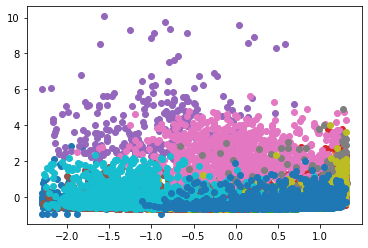

In [393]:
# assign a cluster to each example
labels = kmeans.predict(df1_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df1_scaled_df.to_numpy()[row_ix, 1], df1_scaled_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [394]:
clusters = kmeans.predict(df1_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     1324
1     2617
2     2790
3     1923
4      256
5     1568
6      841
7      741
8      791
9     1257
10    1373
dtype: int64

In [395]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df1_scaled_df)
print(kmeans2.inertia_)

88698.44159193066


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

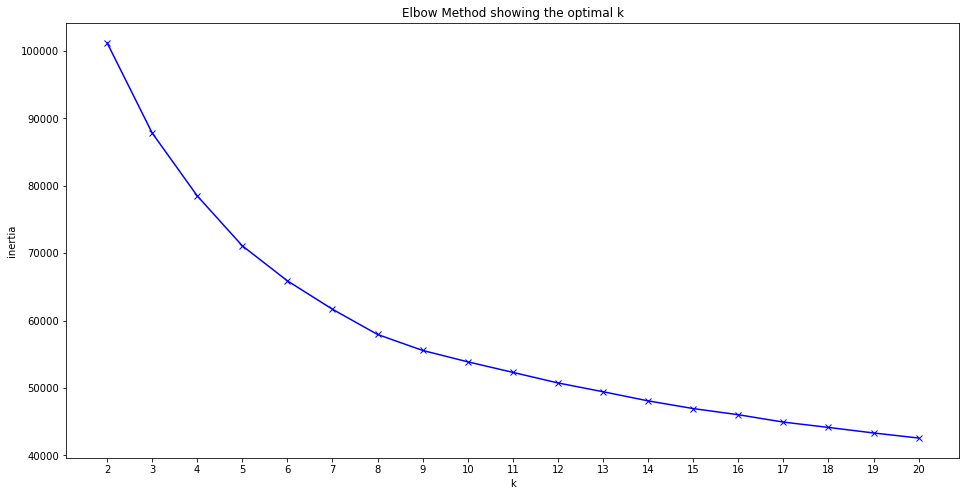

In [396]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df1_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

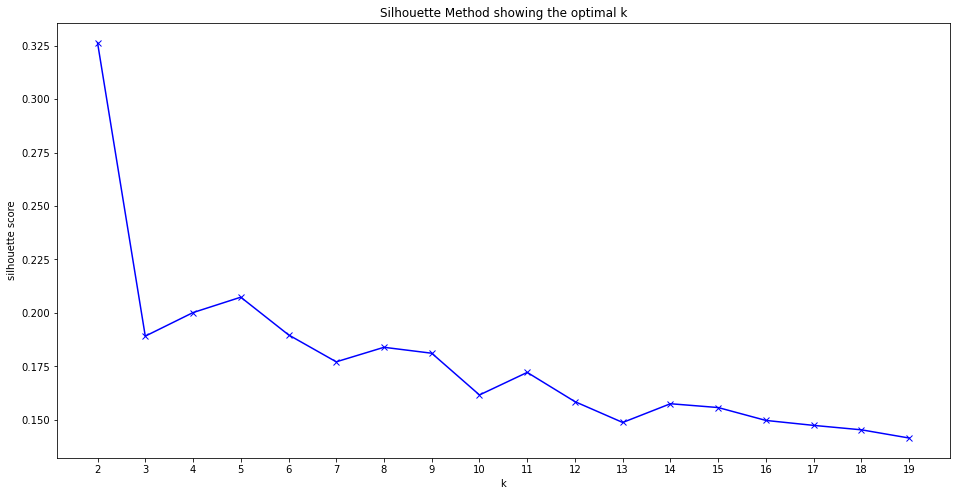

In [397]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df1_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df1_scaled_df, kmeans.predict(df1_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [398]:
df2=pd.merge(df1_scaled_df,df['id'],left_index=True,right_index=True)
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.984799,0.172425,0.512518,0.167624,0.283225,-0.629754,1.297784,0.263761,-1.032135,1ZrpvgLUBHozH2PLbc4SrO
1,2.009695,-0.401470,0.407163,-0.289924,-0.276239,-0.629754,-0.748896,0.918128,-0.320247,1Cv1YLb4q0RzL6pybtaMLo
2,-0.467137,-0.047748,0.427595,-0.127343,-0.675186,-0.629754,0.242270,-1.177404,-1.372389,3vWzyGTu6Ovo1GdrcJqH6e
3,0.734268,-0.004435,0.600817,-0.137795,0.546846,-0.576076,-0.655763,-0.756740,2.192367,5dETo59EO9kIkAIXduzAKo
4,1.172696,1.053120,0.860563,-0.364246,0.022532,-0.626299,-0.480220,-0.515247,-0.385489,4y1nvncvBhdoelqPMyXxis
...,...,...,...,...,...,...,...,...,...,...
15476,1.258104,0.681351,0.829116,-0.455988,-0.249877,-0.629754,0.908316,1.736087,0.679798,78K54LEyjSttk9UTE8PR9r
15477,0.341392,0.984541,0.470767,-0.140118,-0.551284,-0.629477,-0.480220,1.167410,-0.921112,3xhMWYa8ricKp1NN8TVQyS
15478,0.791207,0.111065,0.565462,0.827235,1.062373,-0.629751,-0.726883,-0.301020,1.871927,2rkMiWiaO1iPWjb5Lko8Lu
15479,1.588348,0.901525,1.174674,-0.496633,-0.567101,-0.629754,0.349515,1.288157,0.740497,2o8qn04QtYku0WNWxcGps6


In [405]:
df2["cluster"] = clusters
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,cluster
0,0.984799,0.172425,0.512518,0.167624,0.283225,-0.629754,1.297784,0.263761,-1.032135,1ZrpvgLUBHozH2PLbc4SrO,10
1,2.009695,-0.401470,0.407163,-0.289924,-0.276239,-0.629754,-0.748896,0.918128,-0.320247,1Cv1YLb4q0RzL6pybtaMLo,2
2,-0.467137,-0.047748,0.427595,-0.127343,-0.675186,-0.629754,0.242270,-1.177404,-1.372389,3vWzyGTu6Ovo1GdrcJqH6e,1
3,0.734268,-0.004435,0.600817,-0.137795,0.546846,-0.576076,-0.655763,-0.756740,2.192367,5dETo59EO9kIkAIXduzAKo,3
4,1.172696,1.053120,0.860563,-0.364246,0.022532,-0.626299,-0.480220,-0.515247,-0.385489,4y1nvncvBhdoelqPMyXxis,1
...,...,...,...,...,...,...,...,...,...,...,...
15476,1.258104,0.681351,0.829116,-0.455988,-0.249877,-0.629754,0.908316,1.736087,0.679798,78K54LEyjSttk9UTE8PR9r,10
15477,0.341392,0.984541,0.470767,-0.140118,-0.551284,-0.629477,-0.480220,1.167410,-0.921112,3xhMWYa8ricKp1NN8TVQyS,2
15478,0.791207,0.111065,0.565462,0.827235,1.062373,-0.629751,-0.726883,-0.301020,1.871927,2rkMiWiaO1iPWjb5Lko8Lu,3
15479,1.588348,0.901525,1.174674,-0.496633,-0.567101,-0.629754,0.349515,1.288157,0.740497,2o8qn04QtYku0WNWxcGps6,2


# Saving model

In [406]:
import pickle

scaler = StandardScaler()
model = KMeans()

def save(model, filename = 'filename.pickle'): 
    with open(filename, "wb") as f:
        pickle.dump(model, f)


In [407]:
save(model, filename = 'filename.pickle')

# Test


In [408]:
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"
track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [409]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [410]:
play_song

<function __main__.play_song(track_id)>

# SONG RECOMMENDER
    

In [ ]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.Client_ID,
                                                           client_secret= config.Client_Secret))



In [ ]:
x = input('Please choose song name that you like:\n')
x1 = sp.search(x,limit=3,market="US")
print('Please select one of the options below:\n')
for item,x in zip(x1['tracks']['items'], range(1,4)):
    
    print("'{}', by the Artist: {}".format(item['name'],item["artists"][0]["name"]),
          ', Please enter -',x )
x2=int(input('Your selection: '))
if x2 == 1 or x2 == 2 or x2 == 3 :
    af=sp.audio_features(x1["tracks"]["items"][x2-1]["id"])
    af=pd.DataFrame(af)
    af1=af[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo",]]
     
    #scaler.fit(af1)
    dfy_scaled = scaler.transform(af1)
    cluster = kmeans.predict(dfy_scaled)
    no=cluster[0]
    choice=df2[df2['cluster']==no]
    result=choice.sample()
    st=result['id'].values
    st1=(' '.join(st))

    print('Here is our recommendation:\n')
    
play_song(st1)
#else:
    #(print('Please choose again a song name'))
